Project Simpson

In [3]:
from datascience import *
import numpy as np

import matplotlib.pyplot as plots
%matplotlib inline
plots.style.use('fivethirtyeight')

In [113]:
#Importing the Simpsons episode dataset
simpsons = Table.read_table('simpsons.csv')
simpsons.show(5)

title,description,original_air_date,production_code,directed_by,written_by,season,number_in_season,number_in_series,us_viewers_in_millions,imdb_rating,tmdb_rating
Simpsons Roasting on an Open Fire,Homer is forced to become a department store Santa when ...,12/17/1989,7G08,David Silverman,Mimi Pond,1,1,1,26.7,8.1,6.921
Bart the Genius,Bart ends up at a school for gifted children after cheat ...,1/14/1990,7G02,David Silverman,Jon Vitti,1,2,2,24.5,7.7,7.4
Homer's Odyssey,"After losing his job, Homer contemplates ending it all, ...",1/21/1990,7G03,Wes Archer,Jay Kogen & Wallace Wolodarsky,1,3,3,27.5,7.3,6.5
There's No Disgrace Like Home,After being embarrassed by the rest of the family at a c ...,1/28/1990,7G04,Gregg Vanzo & Kent Butterworth,Al Jean & Mike Reiss,1,4,4,20.2,7.7,7.2
Bart the General,After being beaten up by Nelson Muntz one too many times ...,2/4/1990,7G05,David Silverman,John Swartzwelder,1,5,5,27.1,7.9,6.9


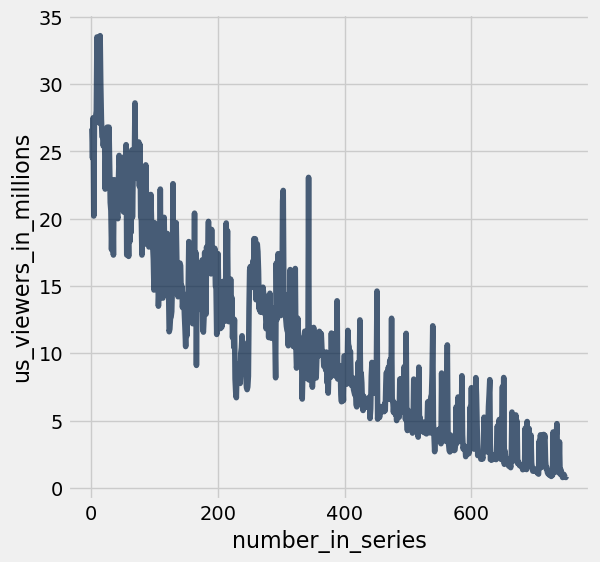

In [116]:
# Constructing a lineplot of the viewership throughout the seasons to see if we notice any trends.

simpsons.plot('number_in_series', 'us_viewers_in_millions')

The overwhelming trend that is displayed in the plot is the downward slope that this line graph has. It indicates that as more and more episodes were released, the viewership gradually declined over time. 

In [120]:
# Seeing which 5 seasons had the highest average viewership per episode

Simpsons_top5_seasons = simpsons.group('season',np.mean).select('season', 'us_viewers_in_millions mean'
                                                               ).sort('us_viewers_in_millions mean', descending = True
                                                                     ).take(np.arange(5))
Simpsons_top5_seasons

season,us_viewers_in_millions mean
1,27.8077
2,24.4045
4,22.3955
3,21.7667
5,18.9136


The `simpsons` table contains ratings for each episode from two sources: IMDB and TMDB. I am going to construct a new table, `simpsons_mean` which contains the same rows and columns of the `simpsons` table as well as an additional column `mean_rating` that averages the IMDB and TMDB ratings for each episode.

In [123]:
rating_array = (simpsons.column('imdb_rating') + simpsons.column('tmdb_rating'))/2
simpsons_mean = simpsons.with_column('mean_rating', rating_array)
simpsons_mean

title,description,original_air_date,production_code,directed_by,written_by,season,number_in_season,number_in_series,us_viewers_in_millions,imdb_rating,tmdb_rating,mean_rating
Simpsons Roasting on an Open Fire,Homer is forced to become a department store Santa when ...,12/17/1989,7G08,David Silverman,Mimi Pond,1,1,1,26.7,8.1,6.921,7.5105
Bart the Genius,Bart ends up at a school for gifted children after cheat ...,1/14/1990,7G02,David Silverman,Jon Vitti,1,2,2,24.5,7.7,7.4,7.55
Homer's Odyssey,"After losing his job, Homer contemplates ending it all, ...",1/21/1990,7G03,Wes Archer,Jay Kogen & Wallace Wolodarsky,1,3,3,27.5,7.3,6.5,6.9
There's No Disgrace Like Home,After being embarrassed by the rest of the family at a c ...,1/28/1990,7G04,Gregg Vanzo & Kent Butterworth,Al Jean & Mike Reiss,1,4,4,20.2,7.7,7.2,7.45
Bart the General,After being beaten up by Nelson Muntz one too many times ...,2/4/1990,7G05,David Silverman,John Swartzwelder,1,5,5,27.1,7.9,6.9,7.4
Moaning Lisa,A depressed Lisa's spirit is lifted when she meets a jaz ...,2/11/1990,7G06,Wes Archer,Al Jean & Mike Reiss,1,6,6,27.4,7.6,7.2,7.4
The Call of the Simpsons,"Homer takes the family camping, but it soon becomes a mi ...",2/18/1990,7G09,Wes Archer,John Swartzwelder,1,7,7,27.6,7.7,6.9,7.3
The Telltale Head,Bart gets more than he bargained for when he saws the he ...,2/25/1990,7G07,Rich Moore,"Al Jean, Mike Reiss, Sam Simon & Matt Groening",1,8,8,28,7.6,7,7.3
Life on the Fast Lane,Marge contemplates an affair with a handsome bowling ins ...,3/18/1990,7G11,David Silverman,John Swartzwelder,1,9,9,33.5,7.4,6.8,7.1
Homer's Night Out,After a photograph of Homer canoodling with an exotic da ...,3/25/1990,7G10,Rich Moore,Jon Vitti,1,10,10,30.3,7.3,6.7,7


Now I am going to use the `simpsons_mean` table to determine the proportion of episodes that have a `mean_rating` (average of the IMDB and TMDB ratings) of 7.0 or higher.

In [126]:
prop_7_or_higher = simpsons_mean.where('mean_rating', are.above_or_equal_to(7.0))
prop_7_or_higher

title,description,original_air_date,production_code,directed_by,written_by,season,number_in_season,number_in_series,us_viewers_in_millions,imdb_rating,tmdb_rating,mean_rating
Simpsons Roasting on an Open Fire,Homer is forced to become a department store Santa when ...,12/17/1989,7G08,David Silverman,Mimi Pond,1,1,1,26.7,8.1,6.921,7.5105
Bart the Genius,Bart ends up at a school for gifted children after cheat ...,1/14/1990,7G02,David Silverman,Jon Vitti,1,2,2,24.5,7.7,7.4,7.55
There's No Disgrace Like Home,After being embarrassed by the rest of the family at a c ...,1/28/1990,7G04,Gregg Vanzo & Kent Butterworth,Al Jean & Mike Reiss,1,4,4,20.2,7.7,7.2,7.45
Bart the General,After being beaten up by Nelson Muntz one too many times ...,2/4/1990,7G05,David Silverman,John Swartzwelder,1,5,5,27.1,7.9,6.9,7.4
Moaning Lisa,A depressed Lisa's spirit is lifted when she meets a jaz ...,2/11/1990,7G06,Wes Archer,Al Jean & Mike Reiss,1,6,6,27.4,7.6,7.2,7.4
The Call of the Simpsons,"Homer takes the family camping, but it soon becomes a mi ...",2/18/1990,7G09,Wes Archer,John Swartzwelder,1,7,7,27.6,7.7,6.9,7.3
The Telltale Head,Bart gets more than he bargained for when he saws the he ...,2/25/1990,7G07,Rich Moore,"Al Jean, Mike Reiss, Sam Simon & Matt Groening",1,8,8,28,7.6,7,7.3
Life on the Fast Lane,Marge contemplates an affair with a handsome bowling ins ...,3/18/1990,7G11,David Silverman,John Swartzwelder,1,9,9,33.5,7.4,6.8,7.1
Homer's Night Out,After a photograph of Homer canoodling with an exotic da ...,3/25/1990,7G10,Rich Moore,Jon Vitti,1,10,10,30.3,7.3,6.7,7
The Crepes of Wrath,"Bart is sent to France on a student exchange program, wh ...",4/15/1990,7G13,Wes Archer & Milton Gray,"George Meyer, Sam Simon, John Swartzwelder & Jon Vitti",1,11,11,31.2,7.7,7,7.35


These are two histograms in the cells below, with the first histogram containing imdb ratings for all episodes in the first 15 seasons of the show, and the second histogram with the tmdb ratings for the first 15 seasons. Both histograms:
* Contain ratings for all episodes for the given seasons
* Use the same bins and have a width of 0.5
* Have the same numerical values on both the vertical and horizontal axes

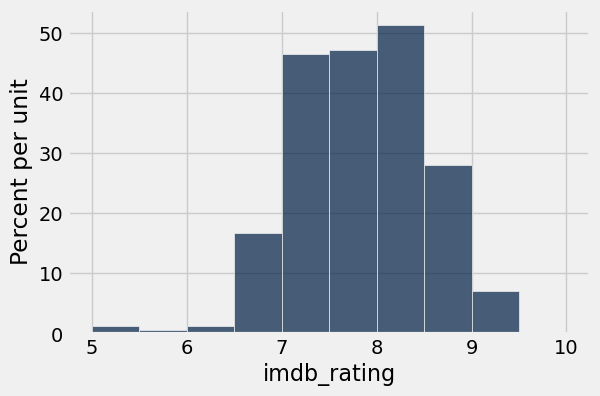

In [129]:
first_15_seasons = simpsons.where('season', are.below(16))
first_15_seasons.hist('imdb_rating', bins = np.arange(5, 10.5, .5))

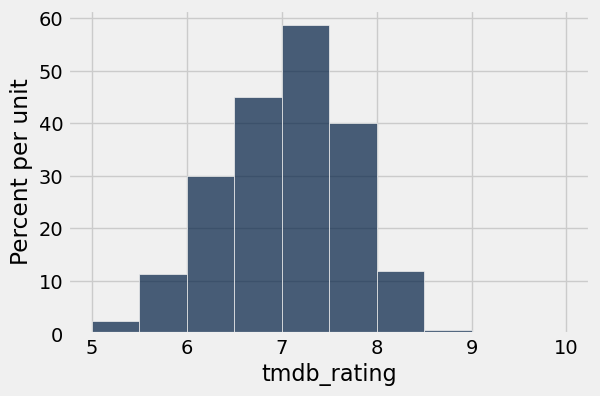

In [131]:
first_15_seasons.hist('tmdb_rating', bins = np.arange(5, 10.5, .5))

It seems that the IMDB ratings are generally considerably higher than the TMDB ratings. The median of IMDB is approximately 7.7, while TMDB is approximately 6.8. IMDB are more generous with their ratings. One similarity is that both of them have a normal distribution. Another similarity is that both don't tend to give extremely high or extremely low ratings. 

The code below are two functions that count how many times the strings 'Homer' and 'Bart' are used in a given string. 

In [135]:
def Homer_count(text):
    return text.count('Homer')


def Bart_count(text):
    return text.count('Bart')

In [137]:
print(simpsons.column(1).item(0))
print('Homer count:', Homer_count(simpsons.column(1).item(0)))
print('Bart count:', Bart_count(simpsons.column(1).item(0)))

Homer is forced to become a department store Santa when Marge spends the family's Christmas savings on removing Bart's tattoo.    
Homer count: 1
Bart count: 1


The code below constructs a new table, `simpsons_Homer_Bart_count`, that has the same rows and columns as the `simpsons` table, as well as two new columns `Homer Count` and `Bart Count`. The values in these columns have the number of times that `Homer` and `Bart` (respectively) were mentioned in the `description` of the episode.

In [140]:
simpsons_Homer_Bart_count = simpsons.with_columns('Homer Count', simpsons.apply(Homer_count, 'description'), 'Bart Count', simpsons.apply(Bart_count, 'description'))
simpsons_Homer_Bart_count

title,description,original_air_date,production_code,directed_by,written_by,season,number_in_season,number_in_series,us_viewers_in_millions,imdb_rating,tmdb_rating,Homer Count,Bart Count
Simpsons Roasting on an Open Fire,Homer is forced to become a department store Santa when ...,12/17/1989,7G08,David Silverman,Mimi Pond,1,1,1,26.7,8.1,6.921,1,1
Bart the Genius,Bart ends up at a school for gifted children after cheat ...,1/14/1990,7G02,David Silverman,Jon Vitti,1,2,2,24.5,7.7,7.4,0,1
Homer's Odyssey,"After losing his job, Homer contemplates ending it all, ...",1/21/1990,7G03,Wes Archer,Jay Kogen & Wallace Wolodarsky,1,3,3,27.5,7.3,6.5,1,0
There's No Disgrace Like Home,After being embarrassed by the rest of the family at a c ...,1/28/1990,7G04,Gregg Vanzo & Kent Butterworth,Al Jean & Mike Reiss,1,4,4,20.2,7.7,7.2,1,0
Bart the General,After being beaten up by Nelson Muntz one too many times ...,2/4/1990,7G05,David Silverman,John Swartzwelder,1,5,5,27.1,7.9,6.9,0,1
Moaning Lisa,A depressed Lisa's spirit is lifted when she meets a jaz ...,2/11/1990,7G06,Wes Archer,Al Jean & Mike Reiss,1,6,6,27.4,7.6,7.2,0,0
The Call of the Simpsons,"Homer takes the family camping, but it soon becomes a mi ...",2/18/1990,7G09,Wes Archer,John Swartzwelder,1,7,7,27.6,7.7,6.9,2,0
The Telltale Head,Bart gets more than he bargained for when he saws the he ...,2/25/1990,7G07,Rich Moore,"Al Jean, Mike Reiss, Sam Simon & Matt Groening",1,8,8,28,7.6,7,0,1
Life on the Fast Lane,Marge contemplates an affair with a handsome bowling ins ...,3/18/1990,7G11,David Silverman,John Swartzwelder,1,9,9,33.5,7.4,6.8,0,0
Homer's Night Out,After a photograph of Homer canoodling with an exotic da ...,3/25/1990,7G10,Rich Moore,Jon Vitti,1,10,10,30.3,7.3,6.7,1,0


To determine who the main character of *The Simpsons* is, I will see which of the two characters are mentioned more often in the descriptions of the episodes. Assign `Homer_count_total` to the total number of times that `Homer` is mentioned in episode descriptions and `Bart_count_total` to the total number of times that `Bart` is mentioned in episode descriptions. You must use code and methods from class to determine these values and not merely state a number.

In [143]:
Homer_count_total = sum(simpsons_Homer_Bart_count.column('Homer Count'))
Bart_count_total = sum(simpsons_Homer_Bart_count.column('Bart Count'))

print('Homer count total:', Homer_count_total)
print('Bart count total :', Bart_count_total)

Homer count total: 456
Bart count total : 279
